## ■ k-means (k개의 평균들) 군집화 이론
    k-means 알고리즘은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작
    
    이 알고리즘은 자율학습의 일종으로 레이블이 달려있지 않은 입력 데이터에 레이블(정답)을 달아주는 역할을 수행

### ※ 문제283. 아래 좌표의 1번, 2번 좌표의 유클리드 거리가 어떻게 되는지 R로 계산하시오

In [2]:
n1 <- c(4,4)
n2 <- c(8,4)
d <- sqrt(sum((n1-n2)^2))
print(d)

[1] 4


### ■ k-means 기본실습 1

```R
1. 기본 데이터 셋을 만든다 
n1 <- c(4,4)
n2 <- c(8,4)
d <- sqrt(sum((n1-n2)^2))
d

c <- c(3,4,1,5,7,9,5,4,6,8,4,5,9,8,7,8,6,7,2,1)
row <- c("A","B","C","D","E","F","G","H","I","J")
col <- c("X","Y")
data <- matrix( c, nrow= 10, ncol=2, byrow=TRUE, dimnames=list(row,col))
data

2. 위에서 만든 데이터셋으로 plot 그래프를 그린다
plot(data)

3. k-means 패키지를 설치한다
install.packages("stats")
library(stats)

4. kmeans 함수로 데이터를 분류한다.
km <- kmeans(data,2) 
km

    K-means clustering with 2 clusters of sizes 5, 5

    Cluster means: # 각 군집의 좌표값
      X   Y
    1 3 3.8
    2 7 8.0

    Clustering vector:
    A B C D E F G H I J 
    1 1 2 1 2 1 2 2 2 1 

    Within cluster sum of squares by cluster:
    [1] 20.8  8.0
     (between_SS / total_SS =  74.5 %)

    Available components:

    [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss" "betweenss"   
    [7] "size"         "iter"         "ifault"

km$centers # 각 좌표의 중앙점 확인
km$cluster

cbind(data, km$cluster)

plot(round(km$center), col=km$center, pch=22, bg=km$center, xlim=range(0:10),ylim=range(0:10))

par(new=T)
plot( data, col=km$cluster+1, xlim=range(0:10), ylim=range(0:10) )

install.packages("factoextra")
library(factoextra)

fviz_cluster( km, data = data, stand=F)
```

[1] 4

,X,Y,
A,3,4,1
B,1,5,1
C,7,9,2
D,5,4,1
E,6,8,2
F,4,5,1
G,9,8,2
H,7,8,2
I,6,7,2
J,2,1,1


Installing package into 'C:/Users/knitwill/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'corrplot', 'viridis', 'ellipse', 'flashClust', 'leaps', 'scatterplot3d', 'ggsci', 'cowplot', 'ggsignif', 'polynom', 'rstatix', 'dendextend', 'FactoMineR', 'ggpubr', 'ggrepel'



package 'corrplot' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'ellipse' successfully unpacked and MD5 sums checked
package 'flashClust' successfully unpacked and MD5 sums checked
package 'leaps' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'ggsci' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'ggsignif' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'rstatix' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'FactoMineR' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'factoextra' successfully unpacked and MD5 sums checked

The down

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


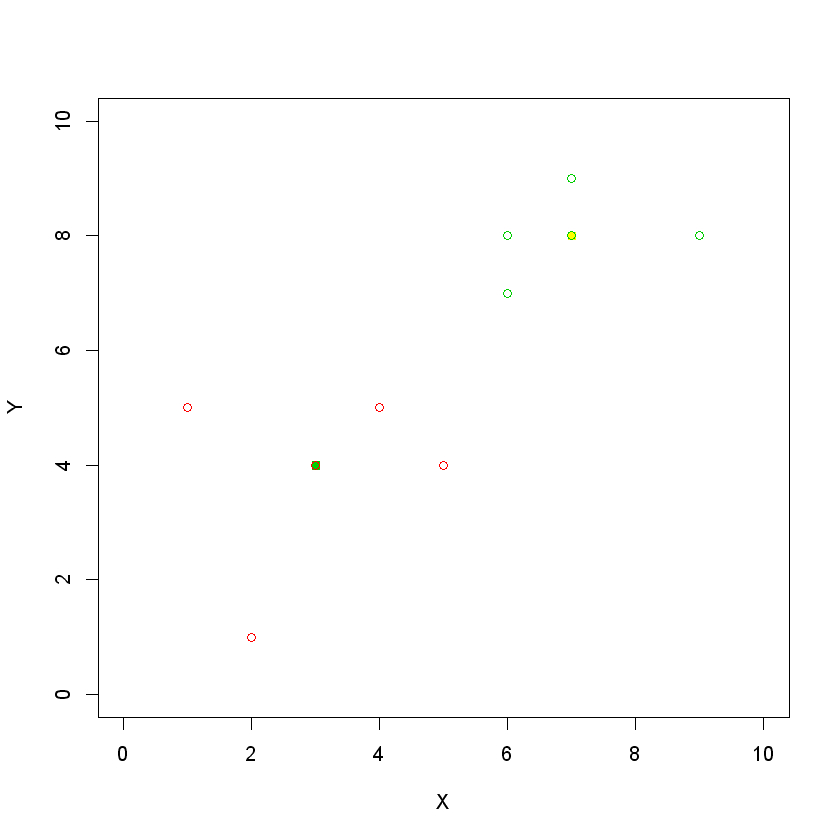

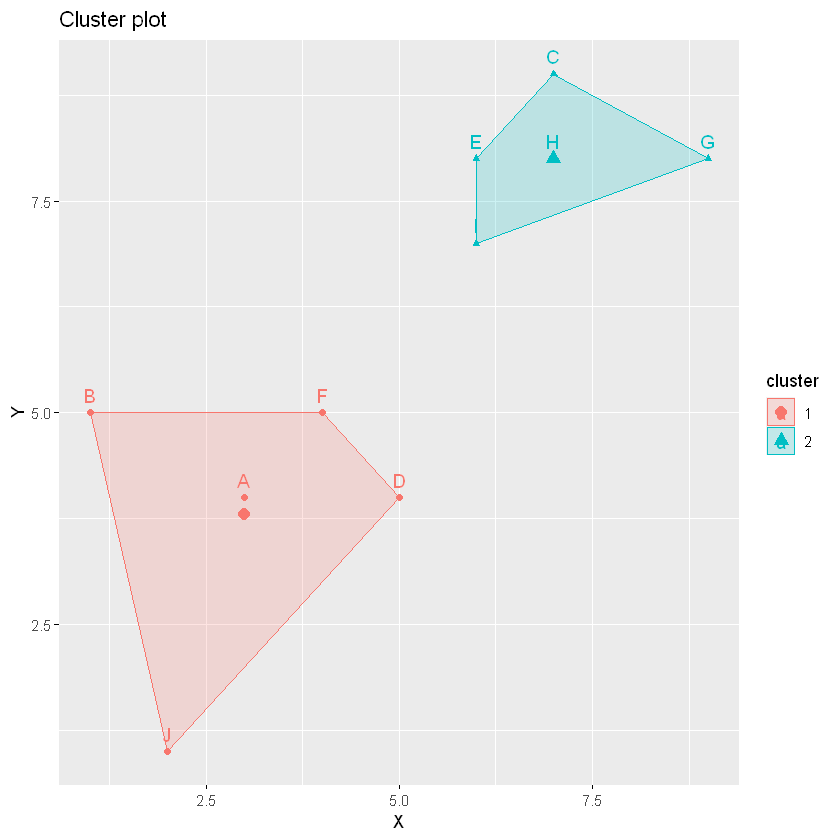

In [3]:
n1 <- c(4,4)
n2 <- c(8,4)
d <- sqrt(sum((n1-n2)^2))
d

c <- c(3,4,1,5,7,9,5,4,6,8,4,5,9,8,7,8,6,7,2,1)
row <- c("A","B","C","D","E","F","G","H","I","J")
col <- c("X","Y")
data <- matrix( c, nrow= 10, ncol=2, byrow=TRUE, dimnames=list(row,col))

#install.packages("stats")
library(stats)

km <- kmeans(data,2) 

cbind(data, km$cluster)

plot(round(km$center), col=km$center, pch=22, bg=km$center, xlim=range(0:10),ylim=range(0:10))
par(new=T)
plot( data, col=km$cluster+1, xlim=range(0:10), ylim=range(0:10) )

install.packages("factoextra")
library(factoextra)

fviz_cluster( km, data = data, stand=F)

## ■ [쉬움주의] k-means 다시 이해하기 쉽게 실습 정리

,X,Y,
APPLE,10,9,3
BACON,1,4,2
BANANA,10,1,1
CARROT,7,10,3
SAL,3,10,3
CHEESE,1,1,2
TOMATO,6,7,3


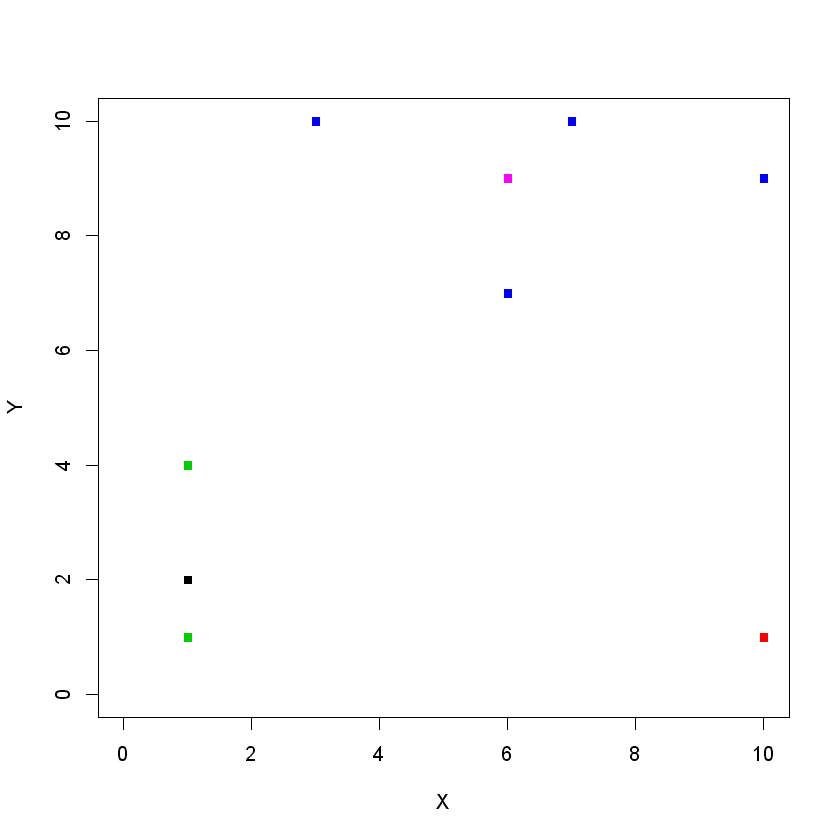

In [4]:
# 1. 사과, 베이컨, 바나나, 당근, 셀러리, 치즈, 토마토 데이터를 준비한다. x축은 단맛, y축은 아삭한 정도

c <- c(10,9,1,4,10,1,7,10,3,10,1,1,6,7)
row <- c("APPLE","BACON","BANANA","CARROT","SAL","CHEESE","TOMATO")
col <- c("X","Y")
data <- matrix( c, nrow= 7, ncol=2, byrow=TRUE, dimnames=list(row,col))

# 2. 야채, 과일, 단백질 3가지를 k-means 가 잘 분류 했는지 시긱화 해서 확인한다. 

#install.packages("stats")
#library(stats)

km <- kmeans(data,  3) 
cbind(data, km$cluster)

plot(round(km$center), col=km$center, pch=22,  bg=km$center, xlim=range(0:10),ylim=range(0:10))
par(new=T)  # 그래프 겹치기 
plot( data, col=km$cluster+1, xlim=range(0:10), ylim=range(0:10), pch=22, bg=km$cluster+1 )

In [ ]:
# 3. 야채, 과일, 단백질 3가지를 k-means 가 잘 분류 했는지 시각화 해서 확인한다. 

#install.packages("factoextra")
#library(factoextra)

fviz_cluster( km, data = data, stand=F)

### ※ 문제284. 국영수 점수 데이터를 가지고 k 값을 4 두고 학생들을 분류하시오!

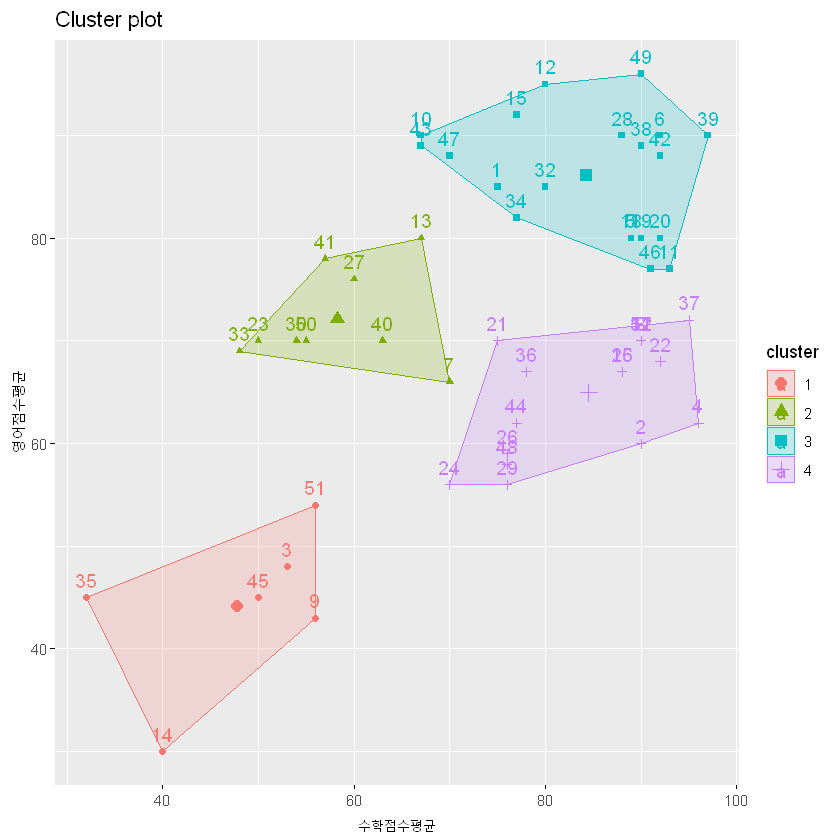

In [12]:
aca <- read.csv('academy.csv')
aca <- aca[,c(3,4)]
km <- kmeans(aca, 4)
fviz_cluster(km, data=aca, stand=F)

    비지도학습은 정답이 없으므로 지도학습 분석에 도움을 받는 방법으로 사용
        - 뷰노에서는 질병 폐사진, 정상 폐사진을 분류할 떄 라벨링(정답화)이 된 폐사진도 활용하지만 라벨링이 안된 폐사진도 비지도학습으로 분류
        - 의사들이 라벨링한 것을 검증하는데 비지도학습 사용
            공단 검진 흉부판독 시 대략 10가지 정도로 분류할 때 분류하는 인공지능 판독기가 있다면 유용